# Ranking
Use where an item's position in an ordered list is more important than its absolute or relative value. Don't be afraid to highlight the points of interest.

In [1]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Ordered bar
Standard bar charts display the ranks of values much more easily when sorted into order

In [8]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


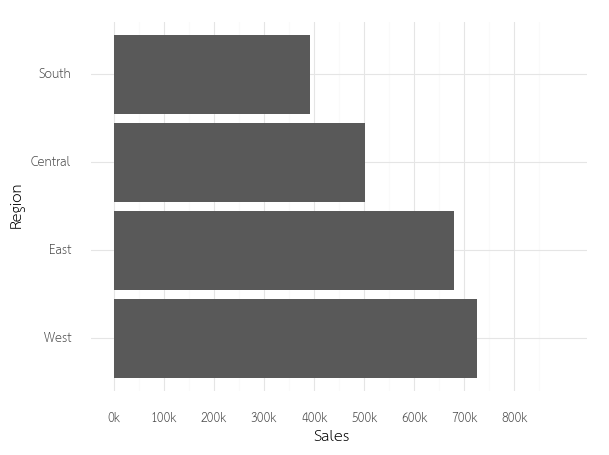

<ggplot: (8750236985064)>

In [9]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col() + coord_flip() +
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Ordered column
See before

In [10]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


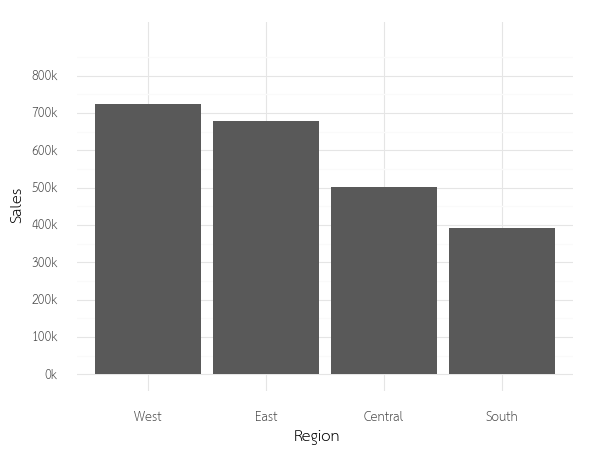

<ggplot: (8750236973432)>

In [11]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col() + 
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Ordered proportional symbol

Use when there are big variations between values and/or seeing fine differences between data is not so important.

In [12]:
df = pd.read_csv('data/ordered-proportional-symbol.csv')
df.head()

,State,Burglary Rate,Murder Rate,Population Size
0,California,693.3,6.9,3420.53
1,Texas,961.6,6.2,2782.72
2,New York,353.3,4.5,2490.77
3,Florida,926.3,5.0,2415.39
4,Illinois,606.9,6.0,2026.50


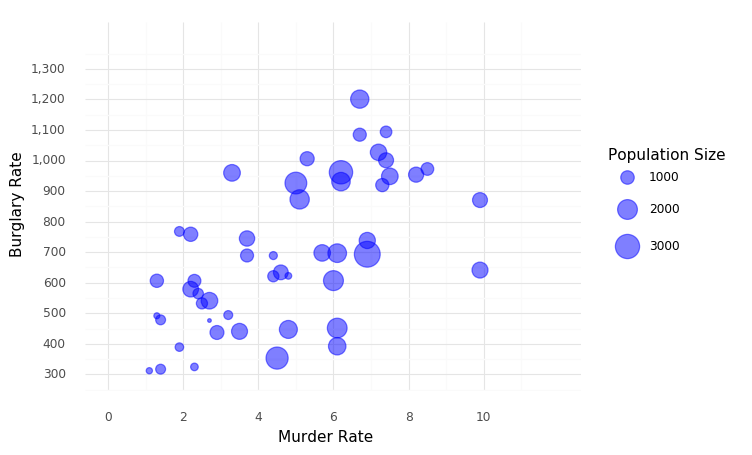

<ggplot: (8750229750469)>

In [22]:
g = (ggplot(df,aes(x='Murder Rate',y='Burglary Rate',size='Population Size')) +
     scale_size(range=(1,10)) + #scaling size
     geom_point(alpha=0.5,color='blue') + theme_minimal() +
     #x and y axis scales
     scale_y_continuous(limits=(300,1400), breaks=range(300,1400,100), 
                        labels=utils.prettynum_format()) +
     scale_x_continuous(limits=(0,12), breaks=range(0,12,2), 
                        labels=lambda x: [i if i%2==0 else '' for i in x]) 
    )
g

## Dot strip plot
Good for showing individual values in a distribution, can be a problem when too many dots have the same value.

In [24]:
df = pd.read_csv('data/dot-strip-plot.csv')
df.head()

,Month of Order Date,Sub-Category,Sales
0,January,Accessories,5477.91
1,February,Accessories,5369.28
2,March,Accessories,8766.64
3,April,Accessories,7951.71
4,May,Accessories,9613.10


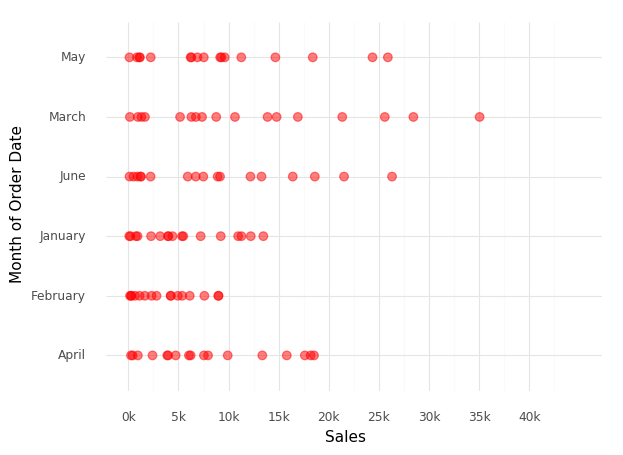

<ggplot: (-9223363286625224034)>

In [25]:
g = (ggplot(df, aes(x='Month of Order Date',y='Sales')) + 
     geom_point(alpha=0.5,color='red',size=3) + #points with decorations
     theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(0,45000),breaks=range(0,45000,5000),
                       labels=utils.k_format()) 
    )
g

## Slope
Perfect for showing how ranks have changed over time or vary between categories.

In [26]:
df = pd.read_csv('data/slope.csv')
df.head()

,Color,Names,State,Value
0,False,% w/ BA or Higher,Wyoming,22.5
1,False,% Obese,Wyoming,25.1
2,False,% w/ BA or Higher,Wisconsin,25.6
3,False,% Obese,Wisconsin,26.3
4,False,% w/ BA or Higher,West Virginia,15.3


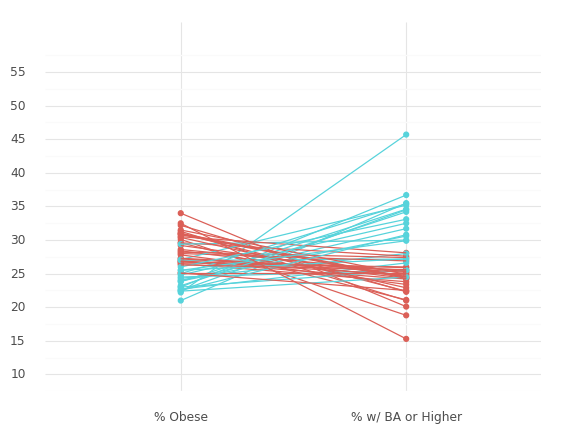

<ggplot: (-9223363286618014513)>

In [31]:
g = (ggplot(df,aes(x='Names',y='Value',color='Color',group='State')) +
     geom_point() + geom_line() + theme_minimal() +
     xlab('') + ylab('') + guides(color=False) +
     scale_y_continuous(limits=(10,60), breaks=range(10,60,5))
    )
g

## Lollipop
Lollipop charts draw more attention to the data value than standard bar/column and can also show rank effectively

In [32]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


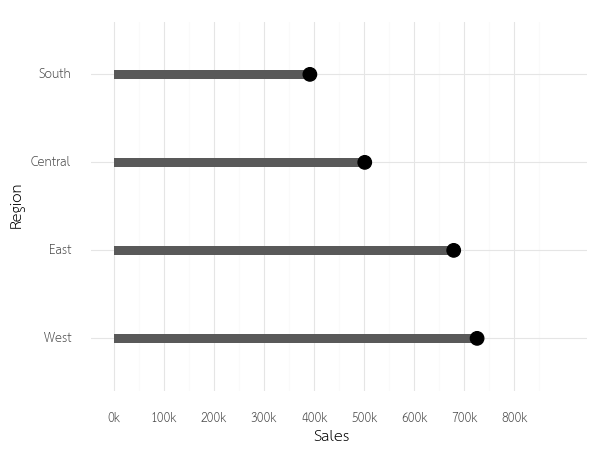

<ggplot: (-9223363286624914649)>

In [40]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col(width=0.1) + geom_point(size=5) + 
     coord_flip() +
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Bump

Effective for showing changing rankings across multiple dates. For large datasets, consider grouping lines using colour.

In [41]:
df = pd.read_csv('data/bump.csv')
df.head()

,Year,Country,Ranking
0,1998,United States,1
1,1999,United States,1
2,2000,United States,1
3,2001,United States,1
4,2002,United States,1


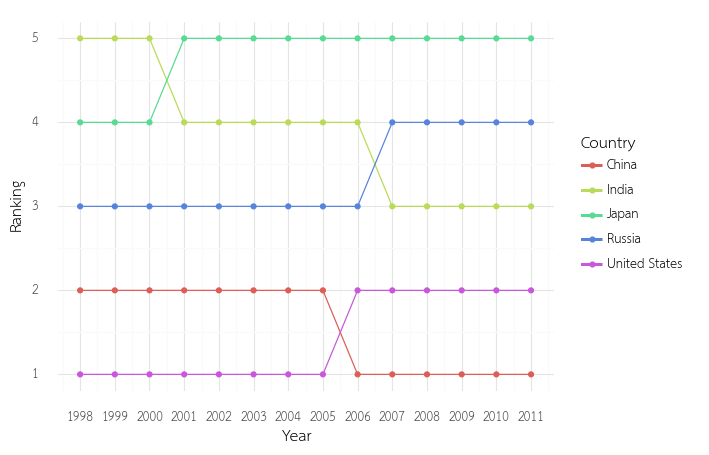

<ggplot: (-9223363286625093828)>

In [45]:
g = (ggplot(df,aes(x='Year',y='Ranking',group='Country',color='Country')) +
     geom_point() + geom_line() +
     scale_x_continuous(breaks=range(1988,2012))
    )
g